In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

# Cargar datos
data  = pd.read_csv("mex_fin.csv")
data

,date,ipc,fix,rate
0,2019-01-31,44472.93,19.54,8.66
1,2019-02-28,45804.76,19.98,6.40
2,2019-03-31,46522.04,19.50,5.38
3,2019-04-30,45585.74,19.70,8.54
4,2019-05-31,45514.08,19.26,7.10
5,2019-06-30,47472.50,18.30,7.37
6,2019-07-31,45643.21,18.13,6.66
7,2019-08-31,45708.10,18.47,5.89
8,2019-09-30,47322.46,18.70,8.76
9,2019-10-31,46975.36,18.73,6.81


In [2]:
fit = smf.ols('ipc ~ fix + rate', data=data).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    ipc   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     103.6
Date:                Thu, 29 Jan 2026   Prob (F-statistic):           5.97e-15
Time:                        12:22:58   Log-Likelihood:                -332.09
No. Observations:                  36   AIC:                             670.2
Df Residuals:                      33   BIC:                             674.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.119e+04   3933.996      2.844      0.0

In [3]:
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']

# Get the test result
test_result = sms.het_breuschpagan(fit.resid, fit.model.exog)

lzip(names, test_result)

[('Lagrange multiplier statistic', np.float64(2.274496129631487)),
 ('p-value', np.float64(0.32070035516495476)),
 ('f-value', np.float64(1.112783556419834)),
 ('f p-value', np.float64(0.3406615445429307))]

In [4]:
import pandas as pd 
import numpy as np 
import statsmodels.api as sm 
from statsmodels.stats.diagnostic import het_breuschpagan, het_white
import matplotlib.pyplot as plt
 
# 1) Cargar datos
df = pd.read_csv("mex_fin.csv")
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values("date")
 
# 2) Variables (ejemplo finanzas)
df["r_ipc"] = np.log(df["ipc"] / df["ipc"].shift(1))
df["r_tc"]  = np.log(df["fix"] / df["fix"].shift(1))
df["vol_ipc"] = df["r_ipc"].rolling(12).std()
 
data = df.dropna(subset=["r_ipc","r_tc","rate","vol_ipc"]).copy()
 
Y = data["r_ipc"]
X = data[["r_tc","rate","vol_ipc"]]
X = sm.add_constant(X)
 
# 3) Estimar OLS
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  r_ipc   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     1.538
Date:                Thu, 29 Jan 2026   Prob (F-statistic):              0.235
Time:                        12:23:00   Log-Likelihood:                 57.382
No. Observations:                  24   AIC:                            -106.8
Df Residuals:                      20   BIC:                            -102.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0609      0.066     -0.928      0.3

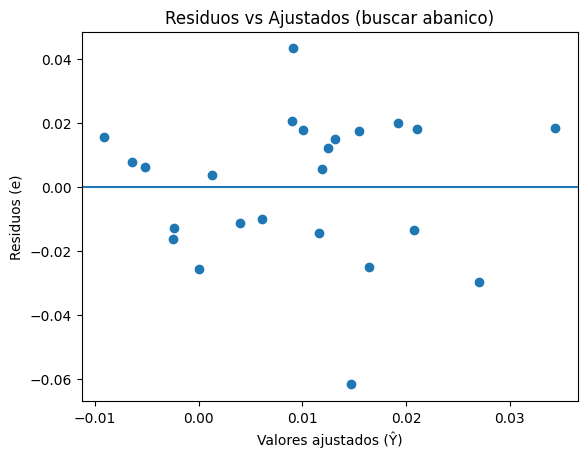


Breusch-Pagan:
{'LM stat': np.float64(8.868960921638006), 'LM p-value': np.float64(0.031084823102776393), 'F stat': np.float64(3.9076236495090773), 'F p-value': np.float64(0.02394281735748679)}


In [5]:
#=========================
# A) Visual: residuos vs ajustados
# =========================
yhat = model.fittedvalues
resid = model.resid
 
plt.figure()
plt.scatter(yhat, resid)
plt.axhline(0)
plt.xlabel("Valores ajustados (Ŷ)")
plt.ylabel("Residuos (e)")
plt.title("Residuos vs Ajustados (buscar abanico)")
plt.show()

# =========================
# B) Prueba Breusch–Pagan
# =========================
bp = het_breuschpagan(resid, model.model.exog)
labels_bp = ["LM stat", "LM p-value", "F stat", "F p-value"]
print("\nBreusch-Pagan:")
print(dict(zip(labels_bp, bp)))

In [6]:
# =========================
# C) Prueba White
# =========================
wh = het_white(resid, model.model.exog)
labels_wh = ["LM stat", "LM p-value", "F stat", "F p-value"]
print("\nWhite:")
print(dict(zip(labels_wh, wh)))


White:
{'LM stat': np.float64(20.211421601479042), 'LM p-value': np.float64(0.016651542928575114), 'F stat': np.float64(8.298624404903514), 'F p-value': np.float64(0.0002952198484053367)}


In [7]:
consumo_y = [100, 102, 105, 98, 108, 110]
pib_x1 = [2.5, 2.0, 3.0, 1.5, 3.2, 3.5]
temperatura_x2 = [22, 23, 24, 21, 25, 26]
precio_energia_x3 = [1.8, 1.9, 1.7, 2.0, 1.6, 1.5]

data = pd.DataFrame({
    'consumo': consumo_y,
    'pib': pib_x1,
    'temperatura': temperatura_x2,
    'precio_energia': precio_energia_x3
})


df_reg = data.copy()
df_reg['r_consumo'] = np.log(df_reg['consumo']).diff()
df_reg['r_pib'] = np.log(df_reg['pib']).diff()
df_reg['r_precio'] = np.log(df_reg['precio_energia']).diff()

df_reg = df_reg.dropna().copy()

Y = df_reg["r_consumo"]
X = df_reg[["r_pib", "r_precio", "temperatura"]]
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              r_consumo   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     2.676
Date:                Thu, 29 Jan 2026   Prob (F-statistic):              0.416
Time:                        12:23:00   Log-Likelihood:                 13.110
No. Observations:                   5   AIC:                            -18.22
Df Residuals:                       1   BIC:                            -19.78
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.1373      0.520     -0.264      

c:\Users\Rodrigo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


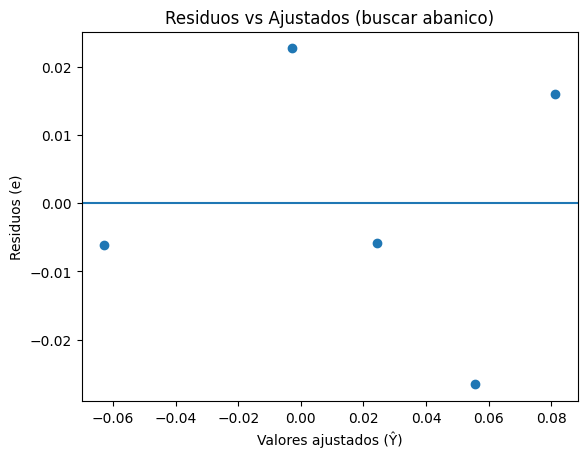


Breusch-Pagan:
{'LM stat': np.float64(4.890266943956947), 'LM p-value': np.float64(0.1800109546849376), 'F stat': np.float64(14.855040405321652), 'F p-value': np.float64(0.18793042776034133)}

White:
{'LM stat': np.float64(5.0), 'LM p-value': np.float64(0.2872974951836458), 'F stat': np.float64(nan), 'F p-value': np.float64(nan)}


In [8]:
#=========================
# A) Visual: residuos vs ajustados
# =========================
yhat = model.fittedvalues
resid = model.resid
 
plt.figure()
plt.scatter(yhat, resid)
plt.axhline(0)
plt.xlabel("Valores ajustados (Ŷ)")
plt.ylabel("Residuos (e)")
plt.title("Residuos vs Ajustados (buscar abanico)")
plt.show()

# =========================
# B) Prueba Breusch–Pagan
# =========================
bp = het_breuschpagan(resid, model.model.exog)
labels_bp = ["LM stat", "LM p-value", "F stat", "F p-value"]
print("\nBreusch-Pagan:")
print(dict(zip(labels_bp, bp)))

# =========================
# C) Prueba White
# =========================
wh = het_white(resid, model.model.exog)
labels_wh = ["LM stat", "LM p-value", "F stat", "F p-value"]
print("\nWhite:")
print(dict(zip(labels_wh, wh)))

In [9]:
alpha = 0.05

p_val_bp = bp[1] 

print(f"P-valor Breusch-Pagan: {p_val_bp:.4f}")
if p_val_bp < alpha:
    print("HAY HETEROCEDASTICIDAD (Rechazamos H0)")
else:
    print("NO HAY HETEROCEDASTICIDAD (No rechazamos H0)")

print("-" * 30)

p_val_white = wh[1]

print(f"P-valor White: {p_val_white:.4f}")
if p_val_white < alpha:
    print("HAY HETEROCEDASTICIDAD según White.")
else:
    print("NO HAY HETEROCEDASTICIDAD según White.")

P-valor Breusch-Pagan: 0.1800
NO HAY HETEROCEDASTICIDAD (No rechazamos H0)
------------------------------
P-valor White: 0.2873
NO HAY HETEROCEDASTICIDAD según White.
